___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:.3f}'.format

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:

df_m = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding="Latin")
df_f = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq", encoding="Latin")
#df_m = pd.read_csv("ANSUR II MALE Public.csv", encoding="Latin")

In [5]:
df = pd.concat([df_m, df_f], axis=0)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,...,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,...,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,...,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,...,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,...,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN


## Explore Data

### EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

In [6]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [7]:
df = df[df.DODRace<4]
df

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,...,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.000,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,...,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.000,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,...,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.000,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,...,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.000,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,...,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.000,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,...,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,NaN,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,262,514,...,354,145,865,840,555,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,832,162,836,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,3,Mexican,3,51,67,180,Right hand,29501.000
1982,NaN,262,1324,301,202,1204,236,181,378,294,287,468,66,309,

In [8]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [9]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic"
})

In [10]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 1985
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [11]:
df.shape

(5769, 109)

In [12]:
df.isnull().sum().any()

True

In [13]:
df.isnull().sum().sum()

10413

In [14]:
df.isnull().sum().sort_values()

interscyei                0
suprasternaleheight       0
stature                   0
span                      0
sleeveoutseam             0
                       ... 
chestheight               0
Heightin                  0
subjectid              1870
SubjectId              3899
Ethnicity              4644
Length: 109, dtype: int64

In [15]:
def list_nulls(data=df):
  drop_list =[]
  for col in data.columns:
    if data[col].isnull().sum()>1800:
      print(f"{col} = {data[col].isnull().sum()}")
      drop_list.append(col)
  return drop_list

In [16]:
df.drop(columns=list_nulls(), inplace=True)

subjectid = 1870
Ethnicity = 4644
SubjectId = 3899


In [17]:
drop_list = ["SubjectNumericRace","Heightin",'Weightlbs','Date','Installation','Component','Branch',"PrimaryMOS"]
df.drop(columns= drop_list , inplace=True)
df.shape

(5769, 98)

In [18]:
df.describe().T.head(50)

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.000,247.254,37.458,155.000,220.000,243.000,272.000,451.000
acromialheight,5769.000,1408.630,78.303,1146.000,1353.000,1412.000,1464.000,1683.000
acromionradialelength,5769.000,328.072,20.445,249.000,314.000,328.000,342.000,393.000
anklecircumference,5769.000,225.202,15.966,156.000,214.000,225.000,235.000,293.000
axillaheight,5769.000,1301.903,71.261,1062.000,1252.000,1304.000,1351.000,1553.000
balloffootcircumference,5769.000,244.408,16.804,186.000,233.000,245.000,256.000,306.000
balloffootlength,5769.000,195.119,13.379,151.000,186.000,196.000,205.000,245.000
biacromialbreadth,5769.000,399.706,30.124,283.000,377.000,404.000,422.000,489.000
bicepscircumferenceflexed,5769.000,341.663,41.271,216.000,312.000,342.000,370.000,490.000
bicristalbreadth,5769.000,274.903,19.240,197.000,262.000,274.000,288.000,362.000


In [19]:
df.duplicated().any()  #any repeating row?

False

In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 1985
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [21]:
# any misentry?
df['Gender'].nunique()

2

In [22]:
#any misentry?
df.sort_values('SubjectsBirthLocation')['SubjectsBirthLocation'].unique()


array(['Alabama', 'Alaska', 'Antigua and Barbuda', 'Argentina', 'Arizona',
       'Arkansas', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'British Virgin Islands',
       'Bulgaria', 'California', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'Colombia', 'Colorado', 'Connecticut', 'Costa Rica',
       'Cuba', 'Delaware', 'Denmark', 'District of Columbia', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'Florida', 'France', 'French Guiana', 'Georgia',
       'Germany', 'Ghana', 'Grenada', 'Guadalupe', 'Guam', 'Guatemala',
       'Guyana', 'Haiti', 'Hawaii', 'Honduras', 'Iceland', 'Idaho',
       'Illinois', 'India', 'Indiana', 'Iowa', 'Iran', 'Iraq', 'Israel',
       'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Kansas', 'Kentucky',
       'Kenya', 'Lebanon', 'Liberia', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Mexico', 'Mi

No misentry.

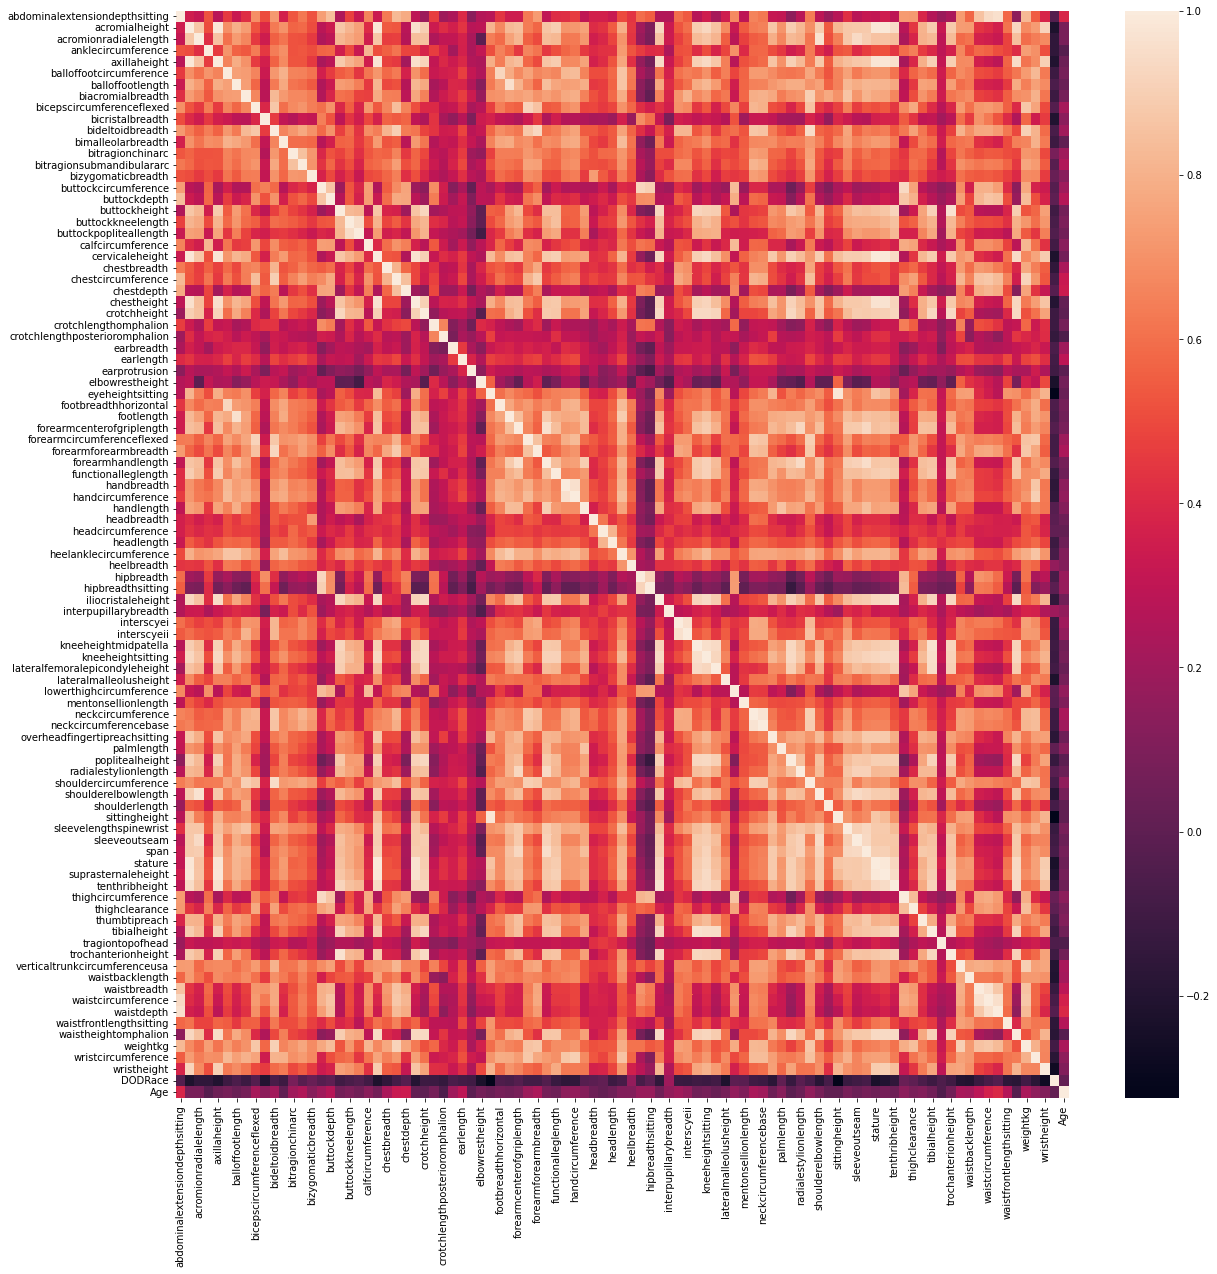

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [ ]:
df1 = df.copy()
df1

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,...,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,North Dakota,1,41,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,...,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,New York,1,35,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,...,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,New York,2,42,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,...,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,Wisconsin,1,31,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,...,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,Male,North Carolina,2,21,Right hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,262,514,456,...,61,423,121,369,391,1307,118,414,237,1036,354,145,865,840,555,1716,1687,1391,1119,660,155,749,446,136,872,1706,447,334,1043,265,370,1002,832,162,836,Female,Texas,3,51,Right hand
1982,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,1151,732,647,331,36,65,23,274,770,101,245,319,261,514,440,...,58,383

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

Vanilla logistic regression is a generalized linear model. (ref: https://stats.stackexchange.com/questions/130970/the-differences-between-randomized-logistic-regression-and-plain-vanilla-logisti/130977)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [ ]:
df1 = pd.get_dummies(df1, drop_first= True)
df1

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,SubjectsBirthLocation_Peru,SubjectsBirthLocation_Philippines,SubjectsBirthLocation_Poland,SubjectsBirthLocation_Portugal,SubjectsBirthLocation_Puerto Rico,SubjectsBirthLocation_Rhode Island,SubjectsBirthLocation_Romania,SubjectsBirthLocation_Russia,SubjectsBirthLocation_Saint Lucia,SubjectsBirthLocation_Senegal,SubjectsBirthLocation_Serbia,SubjectsBirthLocation_Sierra Leone,SubjectsBirthLocation_South Africa,SubjectsBirthLocation_South America,SubjectsBirthLocation_South Carolina,SubjectsBirthLocation_South Dakota,SubjectsBirthLocation_South Korea,SubjectsBirthLocation_Sri Lanka,SubjectsBirthLocation_Sudan,SubjectsBirthLocation_Syria,SubjectsBirthLocation_Tennessee,SubjectsBirthLocation_Texas,SubjectsBirthLocation_Togo,SubjectsBirthLocation_Trinidad and Tobago,SubjectsBirthLocation_Turkey,SubjectsBirthLocation_US Virgin Islands,SubjectsBirthLocation_Ukraine,SubjectsBirthLocation_United Kingdom,SubjectsBirthLocation_United States,SubjectsBirthLocation_Utah,SubjectsBirthLocation_Venezuela,SubjectsBirthLocation_Vermont,SubjectsBirthLocation_Virginia,SubjectsBirthLocation_Washington,SubjectsBirthLocation_West Virginia,SubjectsBirthLocation_Wisconsin,SubjectsBirthLocation_Wyoming,SubjectsBirthLocation_Zambia,WritingPreference_Left hand,WritingPreference_Right hand
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,285,1392,335,223,1297,252,196,368,299,312,477,72,306,282,136,1089,255,856,652,541,373,1457,290,1082,293,1258,779,732,382,36,60,19,210,746,103,259,328,262,514,456,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1982,262,1324,301,202,1204,236,181,378,294,287,468,66,309,311,145,1016,246,818,572,464,375,1390,291,1016,269,1151,732,647,331,36,65,23,274,770,101,245,319,261,5

In [ ]:
df1.shape

(5769, 233)

In [ ]:
X = df1.drop("DODRace", axis=1)
y = df1["DODRace"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [25]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [26]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    return y_pred

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
pipe_logistic = Pipeline(steps=operations)
pipe_logistic.fit(X_train,y_train)
eval_metric(pipe_logistic, X_train, y_train, X_test, y_test)

Test_Set
[[628  22 108]
 [  7 241  12]
 [ 28   9  99]]
              precision    recall  f1-score   support

           1       0.95      0.83      0.88       758
           2       0.89      0.93      0.91       260
           3       0.45      0.73      0.56       136

    accuracy                           0.84      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.88      0.84      0.85      1154


Train_Set
[[2642   62  330]
 [  28  973   37]
 [  57   20  466]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.92      3034
           2       0.92      0.94      0.93      1038
           3       0.56      0.86      0.68       543

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



### Logistic Model GridsearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

In [ ]:
penalty = ["l1", "l2"]               
C = np.logspace(-1, 5, 20)           
class_weight= ["balanced", None]    
solver = ["liblinear"]

In [ ]:
param_grid = {"log__penalty" : penalty,
              "log__C" : C,
              "log__class_weight":class_weight,
              "log__solver":solver}

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

logistic_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring= 'f1',  
                              n_jobs=-1, cv=3)
  
logistic_grid.fit(X_train,y_train)
logistic_grid.best_params_



Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'log__C': 0.1,
 'log__class_weight': 'balanced',
 'log__penalty': 'l1',
 'log__solver': 'liblinear'}

In [ ]:
eval_metric(logistic_grid, X_train, y_train, X_test, y_test)

Test_Set
[[691  31  36]
 [ 27 230   3]
 [ 58  12  66]]
              precision    recall  f1-score   support

           1       0.89      0.91      0.90       758
           2       0.84      0.88      0.86       260
           3       0.63      0.49      0.55       136

    accuracy                           0.86      1154
   macro avg       0.79      0.76      0.77      1154
weighted avg       0.85      0.86      0.85      1154


Train_Set
[[2825   87  122]
 [ 102  909   27]
 [ 195   48  300]]
              precision    recall  f1-score   support

           1       0.90      0.93      0.92      3034
           2       0.87      0.88      0.87      1038
           3       0.67      0.55      0.60       543

    accuracy                           0.87      4615
   macro avg       0.81      0.79      0.80      4615
weighted avg       0.87      0.87      0.87      4615



In [ ]:
log_res = {"Precision": 0.79, "Recall": 0.76, "f1": 0.77}

## 2. SVC

### Vanilla SVC model 

In [28]:
from sklearn.svm import SVC

In [ ]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(random_state=42))]
pipe_svm = Pipeline(steps=operations)

In [ ]:
pipe_svm.fit(X_train, y_train)
eval_metric(pipe_svm, X_train, y_train, X_test, y_test)

Test_Set
[[743  13   2]
 [ 32 228   0]
 [ 85   9  42]]
              precision    recall  f1-score   support

           1       0.86      0.98      0.92       758
           2       0.91      0.88      0.89       260
           3       0.95      0.31      0.47       136

    accuracy                           0.88      1154
   macro avg       0.91      0.72      0.76      1154
weighted avg       0.89      0.88      0.86      1154


Train_Set
[[3010   18    6]
 [ 115  921    2]
 [ 354   29  160]]
              precision    recall  f1-score   support

           1       0.87      0.99      0.92      3034
           2       0.95      0.89      0.92      1038
           3       0.95      0.29      0.45       543

    accuracy                           0.89      4615
   macro avg       0.92      0.72      0.76      4615
weighted avg       0.89      0.89      0.87      4615



#### Cross-validate

In [ ]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(random_state=42))]
pipe_svm = Pipeline(steps=operations)

scores = cross_validate(pipe_svm, X_train, y_train, scoring = 'f1_macro', cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_score   0.724
dtype: float64

###  SVC Model GridsearchCV

In [ ]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear']}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(probability=True , class_weight="balanced", random_state=42))]
pipe_model = Pipeline(steps=operations)

svm_grid = GridSearchCV(pipe_model, param_grid, scoring="f1_macro", cv=5)

In [ ]:
svm_grid.fit(X_train, y_train)
best_params = svm_grid.best_params_
best_params

{'SVC__C': 0.1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}

In [ ]:
svm_grid.best_score_

0.7950527744437108

In [ ]:
eval_metric(svm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[610  20 128]
 [ 13 237  10]
 [ 24   9 103]]
              precision    recall  f1-score   support

           1       0.94      0.80      0.87       758
           2       0.89      0.91      0.90       260
           3       0.43      0.76      0.55       136

    accuracy                           0.82      1154
   macro avg       0.75      0.82      0.77      1154
weighted avg       0.87      0.82      0.84      1154


Train_Set
[[2575   61  398]
 [  46  950   42]
 [  71   20  452]]
              precision    recall  f1-score   support

           1       0.96      0.85      0.90      3034
           2       0.92      0.92      0.92      1038
           3       0.51      0.83      0.63       543

    accuracy                           0.86      4615
   macro avg       0.79      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



In [92]:
svm_res = {"Precision": 0.75, "Recall": 0.82, "f1": 0.77}

Best parameters are:



In [ ]:
best_params

{'SVC__C': 0.1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}

In [ ]:
operations = [("scaler", MinMaxScaler()), ("SVC", SVC(C= best_params['SVC__C'], gamma= best_params['SVC__gamma'], kernel= best_params['SVC__kernel'], probability=True, 
                                                        class_weight="balanced", random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = 'f1_macro', cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score   0.796
dtype: float64

## 3. RF

In [29]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

In [77]:
X2 = df.drop("DODRace", axis=1)
y2 = df['DODRace']
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [78]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,...,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,...,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.000,91.000,41,2.000
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,...,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.000,86.000,35,1.000
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,...,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.000,86.000,42,1.000
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,...,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.000,133.000,31,2.000
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,...,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.000,90.000,21,2.000


In [79]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify =y2)

### Vanilla RF Model

In [ ]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_model.fit(X_train2,y_train2)
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[749   7   2]
 [ 79 181   0]
 [122   9   5]]
              precision    recall  f1-score   support

           1       0.79      0.99      0.88       758
           2       0.92      0.70      0.79       260
           3       0.71      0.04      0.07       136

    accuracy                           0.81      1154
   macro avg       0.81      0.57      0.58      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



#### Cross-validate

In [ ]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = 'f1_macro', cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_score   0.581
dtype: float64

### RF Model GridsearchCV

In [ ]:
param_grid = {'n_estimators':[400,500],
             'max_depth':[10,12,14,16]}

In [ ]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid_model = GridSearchCV(model, param_grid, scoring = "f1_macro", n_jobs = -1, verbose = 2).fit(X_train2, y_train2)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
rf_grid_model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [ ]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[696  23  39]
 [ 58 198   4]
 [ 93  11  32]]
              precision    recall  f1-score   support

           1       0.82      0.92      0.87       758
           2       0.85      0.76      0.80       260
           3       0.43      0.24      0.30       136

    accuracy                           0.80      1154
   macro avg       0.70      0.64      0.66      1154
weighted avg       0.78      0.80      0.79      1154


Train_Set
[[2996    5   33]
 [  19 1017    2]
 [  10    0  533]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      3034
           2       1.00      0.98      0.99      1038
           3       0.94      0.98      0.96       543

    accuracy                           0.99      4615
   macro avg       0.97      0.98      0.98      4615
weighted avg       0.99      0.99      0.99      4615



In [ ]:
rf_res = {"Precision": 0.70, "Recall": 0.64, "f1": 0.66}

## 4. XGBoost

In [30]:
from xgboost import XGBClassifier

### Vanilla XGBoost Model

In [31]:
from sklearn.utils import class_weight

In [ ]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights 

array([0.50703142, 0.50703142, 0.50703142, ..., 1.4820167 , 0.50703142,
       1.4820167 ])

In [ ]:
xgb_model = XGBClassifier(random_state=42)

In [ ]:
xgb_model.fit(X_train2, y_train2, sample_weight=classes_weights)

XGBClassifier(objective='multi:softprob', random_state=42)

In [ ]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[626  33  99]
 [ 16 230  14]
 [ 37  15  84]]
              precision    recall  f1-score   support

           1       0.92      0.83      0.87       758
           2       0.83      0.88      0.86       260
           3       0.43      0.62      0.50       136

    accuracy                           0.81      1154
   macro avg       0.73      0.78      0.74      1154
weighted avg       0.84      0.81      0.82      1154


Train_Set
[[2615   83  336]
 [  28  982   28]
 [  49   11  483]]
              precision    recall  f1-score   support

           1       0.97      0.86      0.91      3034
           2       0.91      0.95      0.93      1038
           3       0.57      0.89      0.69       543

    accuracy                           0.88      4615
   macro avg       0.82      0.90      0.85      4615
weighted avg       0.91      0.88      0.89      4615



#### Cross-validate

In [ ]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = 'f1_macro', cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score   0.749
dtype: float64

### XGBoost Model GridsearchCV

In [ ]:
param_grid = {"n_estimators":[100, 300],'max_depth':[3,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [ ]:
model = XGBClassifier(random_state=42, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_macro',
                          cv=5,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train2, y_train2)
grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 1}

In [ ]:
grid_model.best_score_

0.777250404412149

In [ ]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[734  13  11]
 [ 24 232   4]
 [ 69  11  56]]
              precision    recall  f1-score   support

           1       0.89      0.97      0.93       758
           2       0.91      0.89      0.90       260
           3       0.79      0.41      0.54       136

    accuracy                           0.89      1154
   macro avg       0.86      0.76      0.79      1154
weighted avg       0.88      0.89      0.87      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   7    0  536]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      0.99      0.99       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [93]:
xgb_res = {"Precision": 0.86, "Recall": 0.76, "f1": 0.79}

In [ ]:
xgb_res['Precision']

0.86

## Compare Models

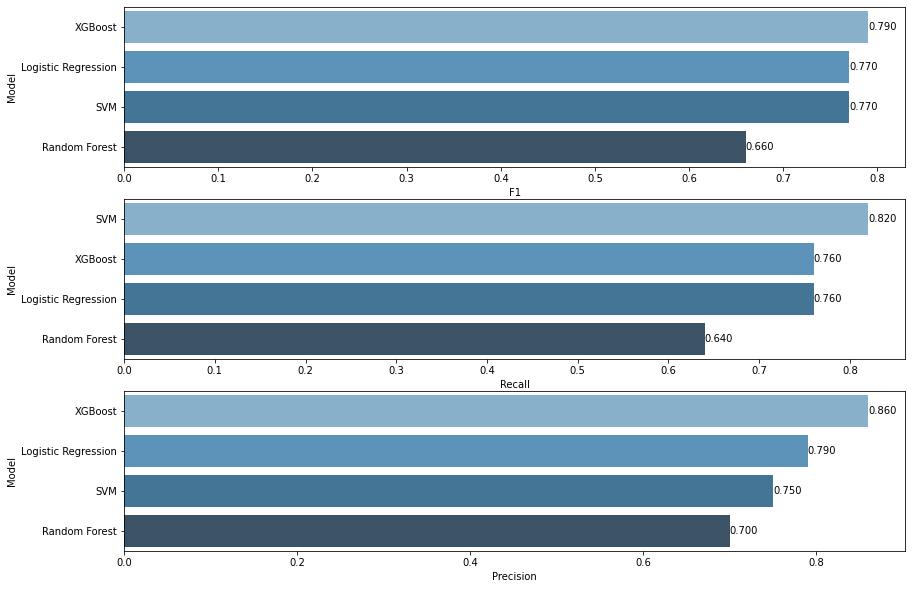

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
                        "F1": [log_res['f1'], svm_res['f1'], rf_res['f1'], xgb_res['f1']],
                        "Recall": [log_res['Recall'], svm_res['Recall'], rf_res['Recall'], xgb_res['Recall']],
                        "Precision": [log_res['Precision'], svm_res['Precision'], rf_res['Precision'], xgb_res['Precision']]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
#!pip install imblearn

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

In [64]:
X = df.drop('DODRace', axis=1)
X = pd.get_dummies(data=X, drop_first=True)
y = df['DODRace']

In [34]:
y.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [56]:
smote = SMOTE(sampling_strategy={"Hispanic": 1000})

In [57]:
rnd_under_sampler = RandomUnderSampler(sampling_strategy={"White": 2600})

In [64]:
steps = [('up', smote), ('down', rnd_under_sampler)]
pipeline = imbPipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [65]:
y_resampled.value_counts()

White       2600
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

## SVC after resampling

Best parameters were:

{'SVC__C': 0.1, 'SVC__gamma': 'scale', 'SVC__kernel': 'linear'}

In [66]:
operations = [('up', smote), ('down', rnd_under_sampler), ("scaler", MinMaxScaler()), 
              ("svm", SVC(C=0.1, gamma='scale', kernel='linear', probability=True , class_weight="balanced", random_state=42))]

In [67]:
smote_pipeline = imbPipeline(steps=operations)

In [68]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('up', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('down', RandomUnderSampler(sampling_strategy={'White': 2600})),
                ('scaler', MinMaxScaler()),
                ('svm',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     probability=True, random_state=42))])

In [69]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[235  17   8]
 [  7 105  24]
 [ 13 102 643]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91       260
    Hispanic       0.47      0.77      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 959   33   46]
 [  29  409  105]
 [  68  360 2606]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92      1038
    Hispanic       0.51      0.75      0.61       543
       White       0.95      0.86      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.85      0.81      4615
weighted avg       0.89      0.86      0.87      4615



In [70]:
svm_resample_res = {"Precision": 0.78, "Recall": 0.84, "f1": 0.80}

## Xgboost after resampling

Best parameters were:

{'colsample_bytree': 0.5,  'learning_rate': 0.2,  'max_depth': 3, 'n_estimators': 300,  'subsample': 1}

In [80]:
operations = [('up', smote), ('down', rnd_under_sampler), ("scaler", MinMaxScaler()), 
              ("xgb", XGBClassifier(random_state=42, objective="reg:squarederror", colsample_bytree=0.5, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1))]

In [81]:
smote_pipeline = imbPipeline(steps=operations)

In [82]:
smote_pipeline.fit(X_train2, y_train2)

Pipeline(steps=[('up', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('down', RandomUnderSampler(sampling_strategy={'White': 2600})),
                ('scaler', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(colsample_bytree=0.5, learning_rate=0.2,
                               n_estimators=300, objective='multi:softprob',
                               random_state=42))])

In [85]:
y_pred2 = eval_metric(smote_pipeline, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[224  12  24]
 [  8  68  60]
 [ 11  24 723]]
              precision    recall  f1-score   support

       Black       0.92      0.86      0.89       260
    Hispanic       0.65      0.50      0.57       136
       White       0.90      0.95      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.77      0.79      1154
weighted avg       0.87      0.88      0.87      1154


Train_Set
[[1038    0    0]
 [   1  533    9]
 [  14   12 3008]]
              precision    recall  f1-score   support

       Black       0.99      1.00      0.99      1038
    Hispanic       0.98      0.98      0.98       543
       White       1.00      0.99      0.99      3034

    accuracy                           0.99      4615
   macro avg       0.99      0.99      0.99      4615
weighted avg       0.99      0.99      0.99      4615



In [84]:
xgb_resample_res = {"Precision": 0.82, "Recall": 0.77, "f1": 0.79}

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [86]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test2, y_pred2)

0.7534262704495923

In [87]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test2, y_pred2)

0.7504131099790566

## Compare after resampling

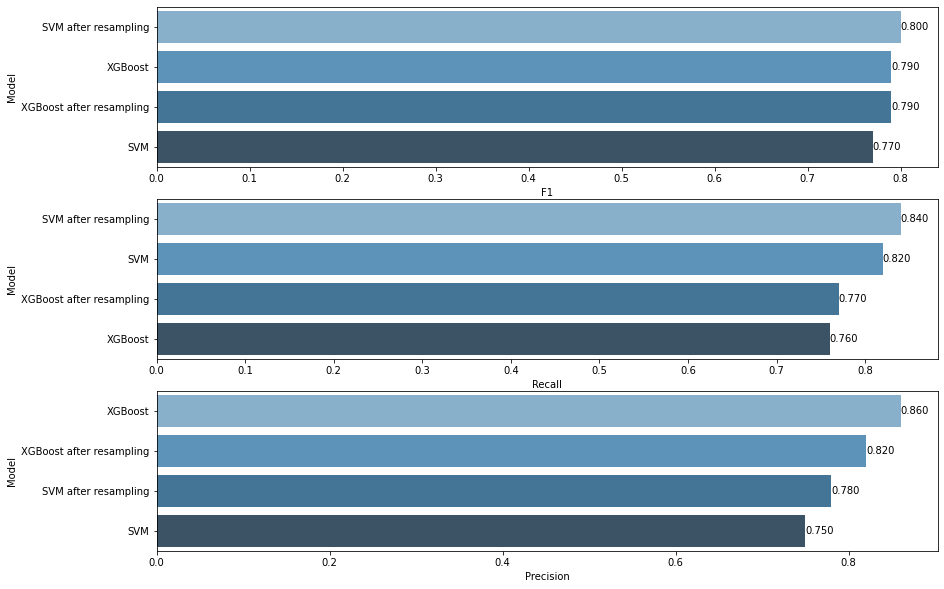

In [94]:
compare = pd.DataFrame({"Model": ["SVM", "SVM after resampling", "XGBoost", "XGBoost after resampling"],
                        "F1": [svm_res['f1'], svm_resample_res['f1'], xgb_res['f1'], xgb_resample_res['f1']],
                        "Recall": [svm_res['Recall'], svm_resample_res['Recall'], xgb_res['Recall'], xgb_resample_res['Recall']],
                        "Precision": [svm_res['Precision'], svm_resample_res['Precision'], xgb_res['Precision'], xgb_resample_res['Precision']]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="Precision", ascending=False)
ax=sns.barplot(x="Precision", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [37]:
import shap

#### Find important features

In [40]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
model_shap = SVC(C=0.1, gamma='scale', kernel='linear', probability=True , class_weight="balanced", random_state=42)
model_shap.fit(X_train_scaled, y_train)

SVC(C=0.1, class_weight='balanced', kernel='linear', probability=True,
    random_state=42)

In [42]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

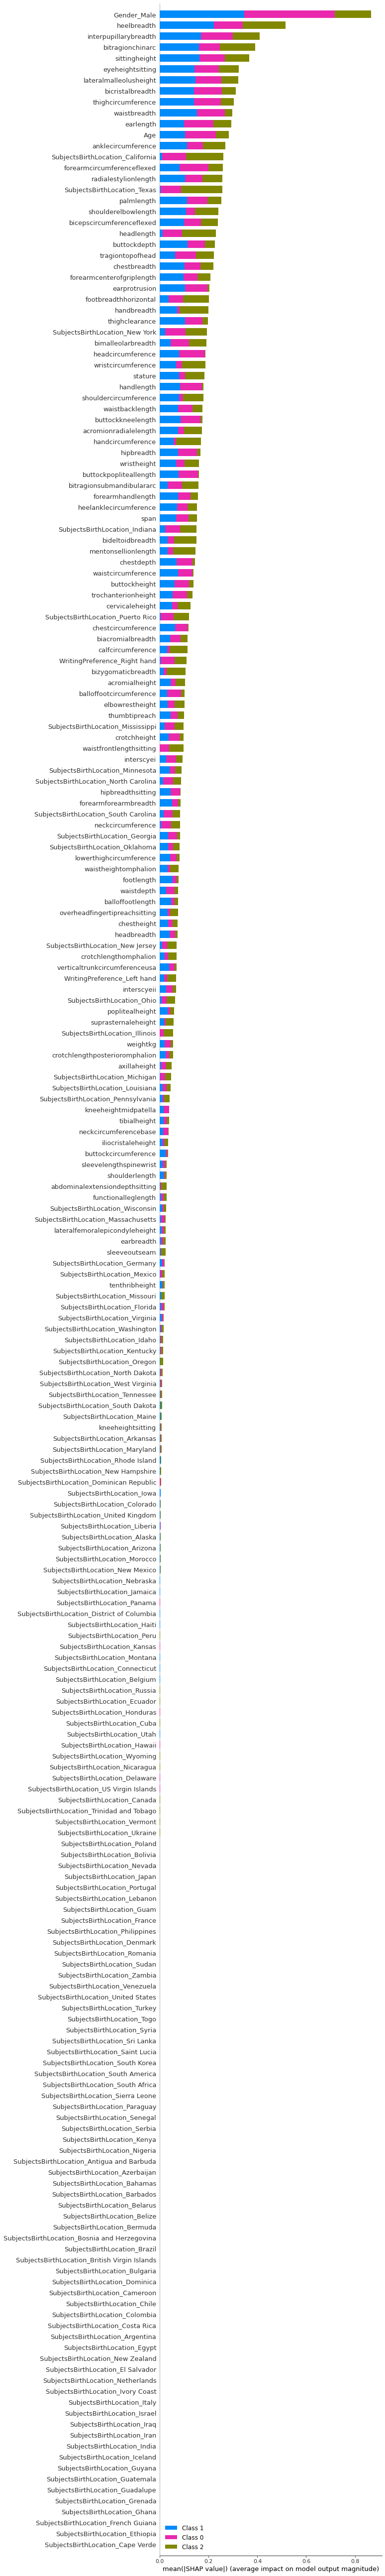

In [45]:
shap.summary_plot(shap_values, X_train_scaled,max_display=300,feature_names = X.columns)

In [54]:
hispanic = ['acromialheight',
 'acromionradialelength',
 'anklecircumference',
 'balloffootcircumference',
 'balloffootlength',
 'biacromialbreadth',
 'bicepscircumferenceflexed',
 'bicristalbreadth',
 'bideltoidbreadth',
 'bimalleolarbreadth',
 'bitragionchinarc',
 'bitragionsubmandibulararc',
 'bizygomaticbreadth',
 'calfcircumference',
 'cervicaleheight',
 'chestbreadth',
 'chestheight',
 'crotchlengthomphalion',
 'earlength',
 'elbowrestheight',
 'eyeheightsitting',
 'footbreadthhorizontal',
 'footlength',
 'forearmcenterofgriplength',
 'forearmcircumferenceflexed',
 'forearmhandlength',
 'handbreadth',
 'handcircumference',
 'headbreadth',
 'headlength',
 'heelanklecircumference',
 'heelbreadth',
 'interpupillarybreadth',
 'interscyei',
 'interscyeii',
 'lateralmalleolusheight',
 'lowerthighcircumference',
 'mentonsellionlength',
 'neckcircumference',
 'overheadfingertipreachsitting',
 'palmlength',
 'poplitealheight',
 'radialestylionlength',
 'shouldercircumference',
 'shoulderelbowlength',
 'sittingheight',
 'span',
 'stature',
 'suprasternaleheight',
 'thighcircumference',
 'thighclearance',
 'thumbtipreach',
 'tragiontopofhead',
 'waistbacklength',
 'waistdepth',
 'waistfrontlengthsitting',
 'waistheightomphalion',
 'wristcircumference',
 'wristheight',
 'Age',
 'Gender',
 'SubjectsBirthLocation']

In [ ]:
#list(X.columns)

In [55]:
X3 = df[hispanic]    
X3 = pd.get_dummies(data=X3, drop_first=True)
y = df.DODRace

In [56]:
X3.shape 

(5769, 196)

In [58]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42, stratify =y)

In [59]:
operations = [("scaler", MinMaxScaler()), ("svm", SVC(C=0.1, gamma='scale', kernel='linear', probability=True , class_weight="balanced", random_state=42))]
pipe_shap_model = Pipeline(steps=operations)

In [60]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svm',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     probability=True, random_state=42))])

In [61]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[232  21   7]
 [  8 105  23]
 [ 25 108 625]]
              precision    recall  f1-score   support

       Black       0.88      0.89      0.88       260
    Hispanic       0.45      0.77      0.57       136
       White       0.95      0.82      0.88       758

    accuracy                           0.83      1154
   macro avg       0.76      0.83      0.78      1154
weighted avg       0.88      0.83      0.85      1154


Train_Set
[[ 940   44   54]
 [  27  440   76]
 [  89  436 2509]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90      1038
    Hispanic       0.48      0.81      0.60       543
       White       0.95      0.83      0.88      3034

    accuracy                           0.84      4615
   macro avg       0.77      0.85      0.79      4615
weighted avg       0.88      0.84      0.85      4615



array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

In [63]:
svm_resample_res = {"Precision": 0.78, "Recall": 0.84, "f1": 0.80}
svm_shap_res = {"Precision": 0.76, "Recall": 0.83, "f1": 0.78}

In [62]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = "f1_macro", cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score   0.781
dtype: float64

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [65]:
import pickle

In [71]:
operations = [('up', SMOTE(sampling_strategy={'Hispanic': 1000})), 
              ('down', RandomUnderSampler(sampling_strategy={'White': 2600})), 
              ('scaler', MinMaxScaler()),
              ("svm", SVC(C=0.1, kernel='linear', probability=True , class_weight="balanced", random_state=42))]

In [72]:
final_model = imbPipeline(steps=operations)

In [73]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('up', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('down', RandomUnderSampler(sampling_strategy={'White': 2600})),
                ('scaler', MinMaxScaler()),
                ('svm',
                 SVC(C=0.1, class_weight='balanced', kernel='linear',
                     probability=True, random_state=42))])

In [75]:
pickle.dump(final_model, open("final_model_Pro2", 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___